In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# step 1
# create dataset object
fashion_mnist = keras.datasets.fashion_mnist

# load splited dataset in tuples
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]

194

In [5]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

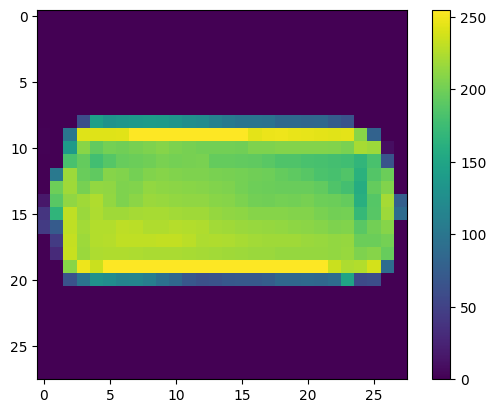

In [14]:
plt.figure()
plt.imshow(train_images[9804])
plt.colorbar()
# plt.grid(False)
plt.show()

In [15]:
# step 2
# normalize the images
train_images = train_images/255.0
test_images = test_images/255.0

In [16]:
# class names
class_name = ['t-shirt/top', 'Trouser', 'Fullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [17]:
# step 3
# building model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # input layer
    keras.layers.Dense(128, activation='relu'),   # hidden layer
    keras.layers.Dense(10, activation='softmax')    # output layer
])

In [18]:
# step 4
# compilation of model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
# step 5
# training model
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2017 - accuracy: 0.9244
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1966 - accuracy: 0.9271
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1920 - accuracy: 0.9280
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1893 - accuracy: 0.9279
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1848 - accuracy: 0.9296
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1807 - accuracy: 0.9323
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1774 - accuracy: 0.9333
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1745 - accuracy: 0.9347
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1712 - accuracy: 0.9354
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.167

In [25]:
# step 6
# evaluation of model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)

print('test accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.8850
test accuracy:  0.8849999904632568


In [26]:
# step 7
# predictions
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Trouser


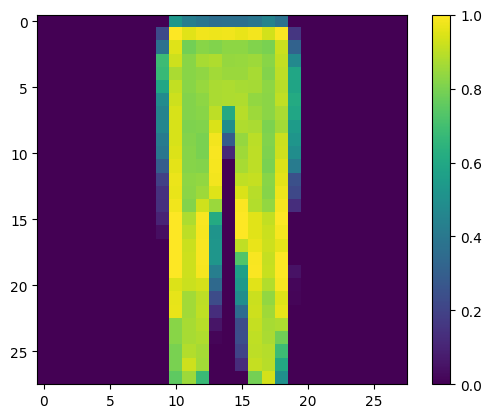

In [29]:
print(class_name[np.argmax(predictions[199])])
plt.figure()
plt.imshow(test_images[199])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 45
1/1 [==============================] - 0s 22ms/step


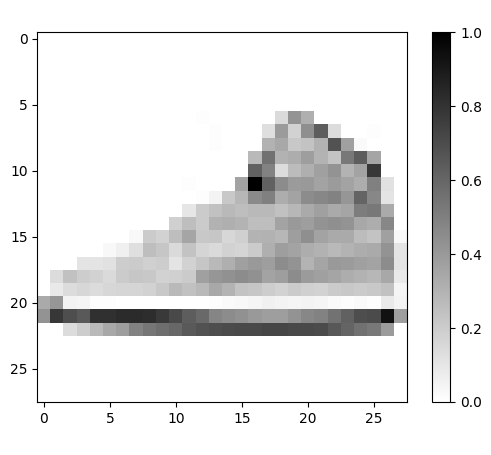

guess:  Sneaker
expected:  Sneaker


In [31]:
# verifying predictions
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print('guess: ', guess)
  print('expected: ', label)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

